In [1]:
import sys, site
print(sys.executable)
print(site.getsitepackages())


/Users/jaspalsingh/Desktop/agentic-rag/.venv/bin/python
['/Users/jaspalsingh/Desktop/agentic-rag/.venv/lib/python3.13/site-packages']


In [3]:
import os
from typing import List, Annotated
from pydantic import BaseModel

from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.chat_models import init_chat_model
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
from langgraph.graph import StateGraph, END

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
llm=init_chat_model("openai:gpt-4o")
llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x116771e80>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1167730e0>, root_client=<openai.OpenAI object at 0x11644b230>, root_async_client=<openai.AsyncOpenAI object at 0x116772e40>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

# Document Preprocessing

In [5]:
urls=[
    "https://www.ijnrd.org/papers/IJNRDTH00099.pdf","https://publications.anveshanaindia.com/wp-content/uploads/2022/10/A-STUDY-ON-CRICKET-TEAM-SELECTION-UTILIZING-SOME-TECHNIQUES.pdf"
]
loaders = [WebBaseLoader(url) for url in urls]
docs = []
for loader in loaders:
    docs.extend(loader.load())

docs

[Document(metadata={'source': 'https://www.ijnrd.org/papers/IJNRDTH00099.pdf'}, page_content='%PDF-1.5\r\n%����\r\n1 0 obj\r\n<>>>\r\nendobj\r\n2 0 obj\r\n<>\r\nendobj\r\n3 0 obj\r\n<>/ExtGState<>/Font<>/ProcSet[/PDF/Text/ImageB/ImageC/ImageI] >>/Annots[ 15 0 R] /MediaBox[ 0 0 595.4 841.8] /Contents 4 0 R/Group<>/Tabs/S/StructParents 0>>\r\nendobj\r\n4 0 obj\r\n<>\r\nstream\r\nx��=�r\x1b����?�[�S�xp\x19��nJU�\x15\'N�8��=�!�<�"M)�H�\x16�uj\x7fh�rѸ6\x06\x00�\x0b\x18m�"�sA7\x1a�F����������u���Ϗ��g�g�y����տ��|�Z<�e�<_ͮ�\u05eb�m�]å\x1f\x16�����a���e���ߺj��铏O�4US�C[���O��O���j��IKI-*u_}b��ۊ�\\>uz����ח�墭��կz��������A_��\x17_��4����O�\x1a_~����UO�|��\x12�"t���ɫM�\x1b9�R���o�E�<�����O~�T[����:����$\x12\x0fF�rV�~��\x1c�V\x7f�@\x15��E���N\x0f�IE�\x07���?�\x13�?��)��8�&o�\x1e�O��L\x0fؤ�����\x122��\x177Ӄnr\t\x7f\x16S9�\x00�=��w?OI��l�\x13D�\x0c���ו�1�O���W\x00�DEÆA\x7f�O�ϛ�\x00@tJ�~��?�$aۆ�d�\x0b�%�AYLx��\x17\x13E\x1d\x02t�S\x14�K\\K��<=\x10���?\x00y\x1a!�7�\x10�g\x05�Vz��\x0b��q�[�J�\x12*�)�S\x06�

# Recursive character text splitter and vectorstore

In [7]:
splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)
split_docs = splitter.split_documents(docs)

embedding = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(split_docs,embedding)
retriever = vectorstore.as_retriever()

In [8]:
retriever.invoke("who is better Bhuvneshwar Kumar vs Ishant Sharma")

[Document(id='e863520d-7b19-44f9-95ae-d4f2b4c1cab8', metadata={'source': 'https://www.ijnrd.org/papers/IJNRDTH00099.pdf'}, page_content='endobj\r\n86 0 obj\r\n<</Subtype/Link/Rect[ 262.2 371.61 533.86 383.11] /BS<</W 0>>/F 4/A<</Type/Action/S/URI/URI(https://www.espncricinfo.com/player/bhuvneshwar-kumar-326016) >>/StructParent 14>>\r\nendobj\r\n87 0 obj\r\n<</Subtype/Link/Rect[ 262.2 336.62 507.75 348.12] /BS<</W 0>>/F 4/A<</Type/Action/S/URI/URI(https://www.espncricinfo.com/player/ishant-sharma-236779) >>/StructParent 15>>\r\nendobj\r\n88 0 obj'),
 Document(id='f2981b76-13aa-4af6-b273-f95b900146a4', metadata={'source': 'https://www.ijnrd.org/papers/IJNRDTH00099.pdf'}, page_content='endobj\r\n259 0 obj\r\n<</Subtype/Link/Rect[ 12.2 706.59 176.28 718.09] /BS<</W 0>>/F 4/A<</Type/Action/S/URI/URI(https://timesofindia.indiatimes.com/news/csk-rr-suspended-from-ipl-for-2-years-meiyappan-kundra-banned-for-life/articleshow/48067702.cms) >>/StructParent 53>>\r\nendobj\r\n260 0 obj'),
 Document

# Define RAG state

In [10]:
class RAGState(BaseModel):
    question:str
    retrieved_docs: List[Document] = []
    answer: str = ""

# Langgraph nodes

In [11]:
def retrieve_docs(state:RAGState) -> RAGState:
    docs = retriever.invoke(state.question)
    return RAGState(question=state.question,retrieved_docs=docs)

def generate_answer(state:RAGState) -> RAGState:
    context = "\n\n".join([doc.page_content for doc in state.retrieved_docs])
    prompt = f"Answer the question based on the context.\n\nContext:\n{context}\n\nQuestion: {state.question}"
    response = llm.invoke(prompt)
    return RAGState(question=state.question, retrieved_docs=state.retrieved_docs,answer=response.content)

# Build Langgraph

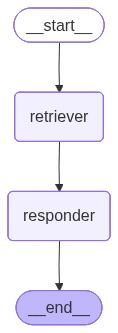

In [12]:
builder = StateGraph(RAGState)
builder.add_node("retriever",retrieve_docs)
builder.add_node("responder",generate_answer)

builder.set_entry_point("retriever")
builder.add_edge("retriever","responder")
builder.add_edge("responder",END)

graph = builder.compile()
graph

# Run the agentic RAG

In [13]:
if __name__ == "__main__":
    user_question = "What is the formula for calculating Batting Average?"
    initial_state = RAGState(question=user_question)
    final_state = graph.invoke(initial_state)

    print("\n Final Answer:\n",final_state['answer'])


 Final Answer:
 The formula for calculating Batting Average (BA) in baseball is:

\[ \text{Batting Average} = \frac{\text{Number of Hits}}{\text{Number of Official At Bats}} \]

This statistic measures a player's hitting performance, with higher averages indicating better performance.


In [14]:
final_state

{'question': 'What is the formula for calculating Batting Average?',
 'retrieved_docs': [Document(id='aa728635-82a4-4ef4-acba-d3e7430bb8c7', metadata={'source': 'https://www.ijnrd.org/papers/IJNRDTH00099.pdf'}, page_content='[�\x9es\x03\x03\x03��������%�]�x100����\r\r\r\x12�:;;%�Iv3�͕�������"##%��">>>�kGG��ࠄ>\x0f\x0f��\'O&$$����\x18__ߠ� nĀ7AǦcӱ\x01ǡ��c��\x146��da;Hxx��\t˗/?|�p[��\x14ϫW�rrrbcc�_����+S���W�^�lRpp�~���d*++�e��nnn������N�7,\x06tl:6\x1d\x1bp\x1cz,=V�\x1eKaS�J\x16��466�L��ϯ���2��by��eKKKkk��l�)CCC\x0f\x1f>̙TWW���)�O��,��-**���r�\x17`Ftl:6\x1d\x1bp\x1cz,=V�\x1eKaS�J\x166�$:6\x1d��\r8\x0e=�\x1e�d���)l%\x0b\x1bP\x12\x1d��M�\x06\x1c�\x1eK�U��R�\x14���\r(��MǦc\x03�C���*�c)l\n[��\x06�DǦcӱ\x01ǡ��c��\x146��da\x03J�cӱ�\u0600��c�J�X'),
  Document(id='9c92174d-c769-4fbc-902a-73bd7427b82b', metadata={'source': 'https://www.ijnrd.org/papers/IJNRDTH00099.pdf'}, page_content='=sB/�\x01\x04�\x0b \x04*�#~�؉�HH��S\r�Z���FUTu�/0\x16�\x01D����^q��"P\x0f!�\x0c7T��2�}�\r�&�A�{\x0c��'),
  Document